<a href="https://colab.research.google.com/github/joaochenriques/TurbulenceLab/blob/main/TurbulenceLab_PostProcess_V01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assign the google_link to a '*.h5' file stored in your grive


In [16]:
Cases = { 
    1: ( 'Turbulence_Lab',  'https://drive.google.com/file/d/1IcAEOSKGW5kyhw4t3vg3ZZ9GTDNbHd9L/view?usp=sharing' ),
    2: ( 'Turbulence_G89',  'https://drive.google.com/file/d/1c4PSd5W_fgagS93TzSW-9bufN5L-7X2u/view?usp=sharing' ),
    3: ( 'Turbulence_G234', 'https://drive.google.com/file/d/14WHwyzIUw5vIvsQFH12mq8OUSH5uO8HJ/view?usp=sharing' ),
    4: ( 'Turbulence_G07',  'https://drive.google.com/file/d/1Nlprjy0b6lP1RxDMHrcs_qL0sqFsGou3/view?usp=sharing' ),
    5: ( 'Turbulence_G00',  'https://drive.google.com/file/d/1jGQFZIlsIWhQsigdKx2ebSordq507v0z/view?usp=sharing' ),
}

FILENAME, LINK = Cases[5]
FILENAME

'Turbulence_G00'

## Import libs

In [17]:
import sys
IN_COLAB = 'google.colab' in sys.modules

In [18]:
if IN_COLAB:
    !pip install gdown > null

In [19]:
import h5py
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
import gdown

In [20]:
# If running python on Windows operating system, copy the file:
# https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py
# to the working folder before running the notebook

import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py 

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (6,4.5)

# Download test case

In [21]:
H5_FILENAME = FILENAME + '.h5'
gdown.download(LINK, H5_FILENAME, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1jGQFZIlsIWhQsigdKx2ebSordq507v0z
To: /content/Turbulence_G00.h5
100%|██████████| 57.6M/57.6M [00:00<00:00, 118MB/s]


'Turbulence_G00.h5'

## Read data file and list all test cases names

In [22]:
hf = h5py.File( H5_FILENAME, 'r' )
list( hf.keys() )

['Central1']

## Save all test cases as comma separated values (*.csv)

In [23]:
for test in hf.keys():
    print( f'Save case: {test}' )
    times = np.array( hf[ test + '/time'] )
    velocity = np.array( hf[ test + '/hotwire'] )

    # data = { 't [s]': times, 'u [m/s]': velocity }
    data = { 'u [m/s]': velocity }
    df_save = pd.DataFrame( data )
    df_save.to_csv( FILENAME + '_' + test + '.csv', index=False, header=False )

Save case: Central1


## If running in google colab then zip all '*.csv' files in a file called 'DataFiles.zip' for download

In [24]:
if IN_COLAB:
    !zip -1 DataFiles.zip  *.csv 

  adding: Turbulence_G00_Central1.csv (deflated 84%)
  adding: Turbulence_G07_Central0.csv (deflated 84%)
  adding: Turbulence_G07_Central1.csv (deflated 83%)
  adding: Turbulence_G07_Central2.csv (deflated 81%)
  adding: Turbulence_G07_Central3.csv (deflated 88%)
  adding: Turbulence_G07_Central4.csv (deflated 86%)


In [25]:
!ls -lah *.zip *.csv

-rw-r--r-- 1 root root 40M Jul  4 15:19 DataFiles.zip
-rw-r--r-- 1 root root 42M Jul  4 15:18 Turbulence_G00_Central1.csv
-rw-r--r-- 1 root root 43M Jul  4 15:18 Turbulence_G07_Central0.csv
-rw-r--r-- 1 root root 42M Jul  4 15:18 Turbulence_G07_Central1.csv
-rw-r--r-- 1 root root 42M Jul  4 15:18 Turbulence_G07_Central2.csv
-rw-r--r-- 1 root root 43M Jul  4 15:18 Turbulence_G07_Central3.csv
-rw-r--r-- 1 root root 43M Jul  4 15:18 Turbulence_G07_Central4.csv


## Plot one case

In [26]:
hf.keys()

<KeysViewHDF5 ['Central1']>

In [28]:
TestCase = list( hf.keys() )[0]
times = np.array( hf[ TestCase + '/time'] )
velocity = np.array( hf[ TestCase + '/hotwire'] )
TestCase

'Central1'

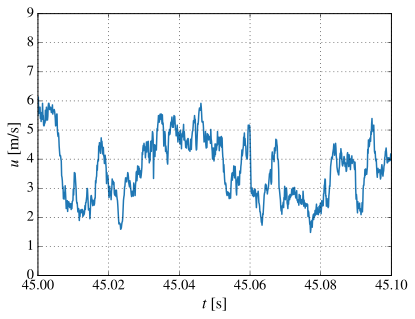

In [29]:
mpl.figure(1)
mpl.plot( times, velocity )
mpl.xlabel( '$t$ [s]')
mpl.ylabel( '$u$ [m/s]')

mpl.xlim( 45, 45.1 )
mpl.grid()

mpl.savefig( 'velocity_zoom.pdf', bbox_inches='tight', pad_inches=0.02 )
mpl.savefig( 'velocity_zoom.svg', bbox_inches='tight', pad_inches=0.02 )
mpl.savefig( 'velocity_zoom.png', bbox_inches='tight', pad_inches=0.02 );

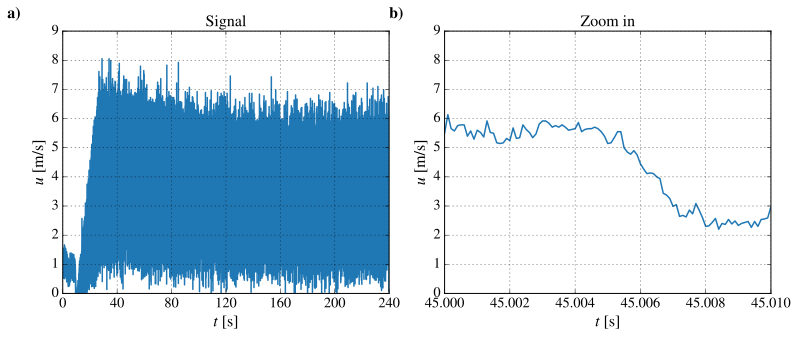

In [30]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.17 )

ax1.set_title('Signal')
ax1.plot( times, velocity )
ax1.set_xlabel( '$t$ [s]')
ax1.set_ylabel( '$u$ [m/s]')
ax1.set_xlim( 0, 240 )
ax1.xaxis.set_major_locator(mpl.MultipleLocator(40))
ax1.grid()
ax1.text(-0.17, 1.05, 'a)', transform=ax1.transAxes, size=16, weight='semibold')

ax2.set_title('Zoom in')
ax2.plot( times, velocity )
ax2.set_xlabel( '$t$ [s]')
ax2.set_ylabel( '$u$ [m/s]')
ax2.set_xlim( 45, 45.01 )
ax2.grid()
ax2.text(-0.17, 1.05, 'b)', transform=ax2.transAxes, size=16, weight='semibold')

mpl.savefig( 'velocity_dual.pdf', bbox_inches='tight', pad_inches=0.02 )
mpl.savefig( 'velocity_dual.svg', bbox_inches='tight', pad_inches=0.02 )
mpl.savefig( 'velocity_dual.png', bbox_inches='tight', pad_inches=0.02 );